In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
import seaborn as sns

In [2]:
#drogas = pd.read_excel('Drogas_com_desc.xlsx')

In [3]:
drogas_final = pd.read_csv('Dados/GESEG_SBX_DROGA_EXPORT.csv', encoding = 'latin-1', sep = ';', index_col=0)

In [4]:
drogas_final_pivot = drogas_final.pivot(index="NRO_INT_OBJETO", columns="ATRIBUTO", values="QUANTIDADE")

In [5]:
dg2_final = drogas_final[['NRO_INT_OBJETO','ANO_OCOR', 'NRO_OCOR','NRO_INT_TIPO_OBJETO','TIPO_OBJETO']].groupby(["NRO_INT_OBJETO"]).min()

In [6]:
dg2_final_sorted = dg2_final.sort_values(by=['NRO_INT_OBJETO'])
drogas_pivot_final_sorted = drogas_final_pivot.sort_values(by=['NRO_INT_OBJETO'])

In [7]:
try_1_final = pd.concat([dg2_final_sorted, drogas_pivot_final_sorted],axis=1)

In [8]:
resultado = try_1_final.reset_index()

In [9]:
#Renomeando Coluans
resultado = resultado.rename(columns={"NRO_INT_OBJETO": "CHAVE_OBJETO", "TIPO_OBJETO": "TXT_TIPO_OBJETO"})

In [10]:
#Error could not convert str to float
#resultado['Peso Total'] = resultado['Peso Total'].astype(float)

In [11]:
#resultado.to_excel('resultado_DROGAS20201002.xlsx')

In [12]:
#Error could not convert string to float
"""resultado['Peso Unitário'] = resultado['Peso Unitário'].replace(',','.', regex=True)
resultado['Peso Total'] = resultado['Peso Total'].replace(',','.', regex=True)
resultado['Peso Unitário'] = resultado['Peso Unitário'].replace('-',0, regex=True)
resultado['Peso Total'] = resultado['Peso Total'].replace('-',0, regex=True)
resultado['Peso Unitário'] = resultado['Peso Unitário'].replace('',0, regex=True)
resultado['Peso Total'] = resultado['Peso Total'].replace('',0, regex=True)

resultado['Peso Unitário'] = resultado['Peso Unitário'].fillna(0)
resultado['Peso Total'] = resultado['Peso Total'].fillna(0)
resultado['Peso Total']  = resultado['Peso Total'].astype(float)
resultado['Peso Unitário']  = resultado['Peso Unitário'].astype(float)"""


"resultado['Peso Unitário'] = resultado['Peso Unitário'].replace(',','.', regex=True)\nresultado['Peso Total'] = resultado['Peso Total'].replace(',','.', regex=True)\nresultado['Peso Unitário'] = resultado['Peso Unitário'].replace('-',0, regex=True)\nresultado['Peso Total'] = resultado['Peso Total'].replace('-',0, regex=True)\nresultado['Peso Unitário'] = resultado['Peso Unitário'].replace('',0, regex=True)\nresultado['Peso Total'] = resultado['Peso Total'].replace('',0, regex=True)\n\nresultado['Peso Unitário'] = resultado['Peso Unitário'].fillna(0)\nresultado['Peso Total'] = resultado['Peso Total'].fillna(0)\nresultado['Peso Total']  = resultado['Peso Total'].astype(float)\nresultado['Peso Unitário']  = resultado['Peso Unitário'].astype(float)"

In [13]:
#Mudando o float do padrão brasileiro para o americano
#Criando novas colunas de Peso para analise e diferenciação de valores entre nova e antiga

resultado['Peso Unitário'] = pd.to_numeric(resultado['Peso Unitário'].str.replace(',','.'), errors='coerce',downcast="float")
resultado['Peso Total'] = pd.to_numeric(resultado['Peso Total'].str.replace(',','.'), errors='coerce',downcast="float")

#Trocando dados NaN por 0
resultado['Peso Unitário'] = resultado['Peso Unitário'].fillna(0)
resultado['Peso Total'] = resultado['Peso Total'].fillna(0)


#Trocando o tipo de dado para float
resultado['Peso Total']  = resultado['Peso Total'].astype(float)
resultado['Peso Unitário']  = resultado['Peso Unitário'].astype(float)

<h1><center>COR</center></h1>

In [14]:
cores = resultado['Cor Predominante'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0],4:cores[4][0]
                             ,5:cores[5][0],6:cores[6][0],7:cores[7][0],8:cores[8][0],9:cores[9][0]
                             ,10:cores[10][0], 11:cores[11][0],12:cores[12][0]})
cores = cores.iloc[1:]
cores1 = resultado['Cor Predominante'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0],4:cores1[4][0]
                             ,5:cores1[5][0],6:cores1[6][0],7:cores1[7][0],8:cores1[8][0],9:cores1[9][0]
                             ,10:cores1[10][0], 11:cores1[11][0],12:cores1[12][0]})
#cores1 = cores.iloc[1:]
cores1
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"%"})
cores2

,Verde,Branco,Amarelo,Marrom,Bege,Incolor,Cinza,Preto,Azul,Prateado,Laranja,Vermelho,Cobreado,13,14,15,16,17
Quantidade,53192,31096,17331,6545,2210,565,543,415,260,224,186,174,161,150,109,34,27,9
%,0.469765,0.274624,0.153059,0.057802,0.019518,0.00499,0.004796,0.003665,0.002296,0.001978,0.001643,0.001537,0.001422,0.001325,0.000963,0.0003,0.000238,0.000079


Text(0.5, 1.0, 'Cor Predominante')

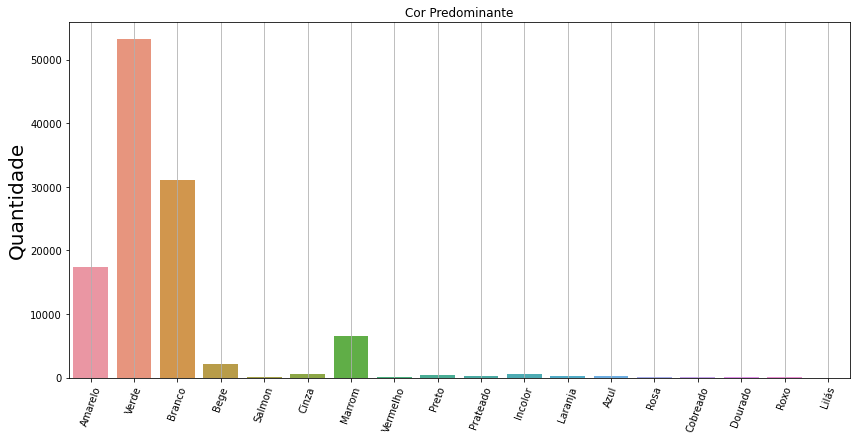

In [15]:
stores_df = resultado

f, (ax1) = plt.subplots(1, 1, figsize=(12, 6))
#palette ={"Verde": "green", "Marrom": "brown", "Branco": "white", "Amarelo": "yellow","Cinza":'grey',"Dourado":'gold',"Laranja":"orange","Azul":"Blue","Vermelho":"Red",'Bege':'beige',"Preto":"black", "Incolor":"blue", "Rosa":"pink", "Cobreado":'coper', "Prateado":'silver','Salmon':'salmon', "Roxo":'black'}

sns.countplot(x="Cor Predominante", data=stores_df, ax=ax1)
#sns.countplot(x="Tipo de Embalagem", data=stores_df, ax=ax2)
#sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette)
palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
ax1.set_ylabel("Quantidade",fontsize=20)
ax1.set(xlabel=None)
#ax2.set_ylabel("Quantidade",fontsize=20)
plt.tight_layout()
plt.grid(axis='x')
plt.title('Cor Predominante')

<h1><center>EMBALAGEM</center></h1>

In [16]:
cores = resultado['Tipo de Embalagem'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0],4:cores[4][0]
                             ,5:cores[5][0],6:cores[6][0],7:cores[7][0],8:cores[8][0],9:cores[9][0]
                             ,10:cores[10][0], 11:cores[11][0],12:cores[12][0]})
cores = cores.iloc[1:]
cores1 = resultado['Tipo de Embalagem'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0],4:cores1[4][0]
                             ,5:cores1[5][0],6:cores1[6][0],7:cores1[7][0],8:cores1[8][0],9:cores1[9][0]
                             ,10:cores1[10][0], 11:cores1[11][0],12:cores1[12][0]})
#cores1 = cores.iloc[1:]
cores1
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"%"})
cores2 = cores2.rename(columns={13:'Maço(s)', 14:'Kit(s)'})
cores2

,Porção(es),Cigarro(s),Tijolo(s),Unidade(s),Saco(s),Pacote(s),Não soube informar,Frasco(s),Comprimido(s),Caixa(s),Ponto(s),Maço(s),Lata(s),Maço(s),Kit(s),15,16,17,18
Quantidade,80822,9302,7676,7478,2185,1682,1557,1163,488,359,172,165,66,34,30,25,15,11,1
%,0.71378,0.082151,0.067791,0.066042,0.019297,0.014855,0.013751,0.010271,0.00431,0.003171,0.001519,0.001457,0.000583,0.0003,0.000265,0.000221,0.000132,0.000097,0.000009


Text(0.5, 1.0, 'Embalagem')

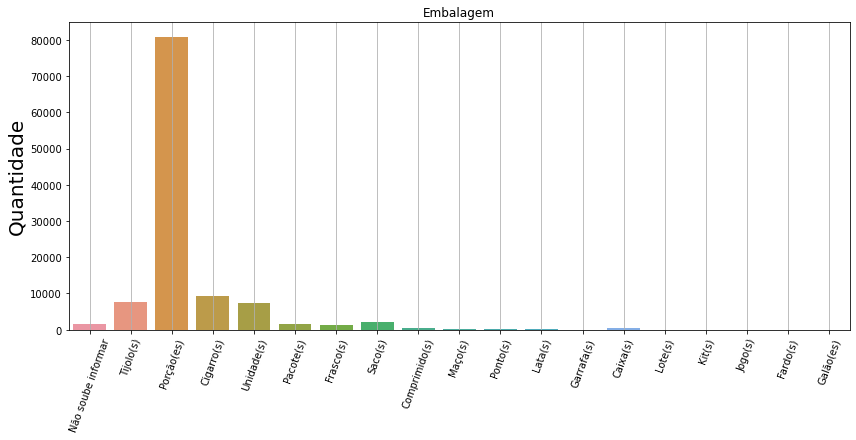

In [17]:
stores_df = resultado

f, (ax2) = plt.subplots(1, 1, figsize=(12, 6))
palette ={"Verde": "green", "Marrom": "brown", "Branco": "white", "Amarelo": "yellow","Cinza":'grey',"Dourado":'gold',"Laranja":"orange","Azul":"Blue","Vermelho":"Red",'Bege':'beige',"Preto":"black", "Incolor":"blue", "Rosa":"pink"}

#sns.countplot(x="Cor Predominante", data=stores_df, ax=ax1, palette = palette)
sns.countplot(x="Tipo de Embalagem", data=stores_df, ax=ax2)
#sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette)
palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
ax2.set(xlabel=None)
#ax1.set_ylabel("Quantidade",fontsize=20)
ax2.set_ylabel("Quantidade",fontsize=20)
plt.tight_layout()
plt.grid(axis='x')
plt.title('Embalagem')

<h1><center>UNIDADE DE PESO</center></h1>

In [18]:
cores = resultado['Unidade de Peso'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0],4:cores[4][0],5:cores[5][0]})
cores = cores.iloc[1:]
cores1 = resultado['Unidade de Peso'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0],4:cores1[4][0],5:cores1[5][0]
                             })
#cores1 = cores.iloc[1:]
cores1
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"%"})
cores2

,Grama,Não soube informar,Quilograma,Miligrama,Decigrama,Tonelada
Quantidade,89308,4720,1474,1200,288,5
%,0.920748,0.048662,0.015197,0.012372,0.002969,0.000052


Text(0.5, 1.0, 'Unidade de Peso')

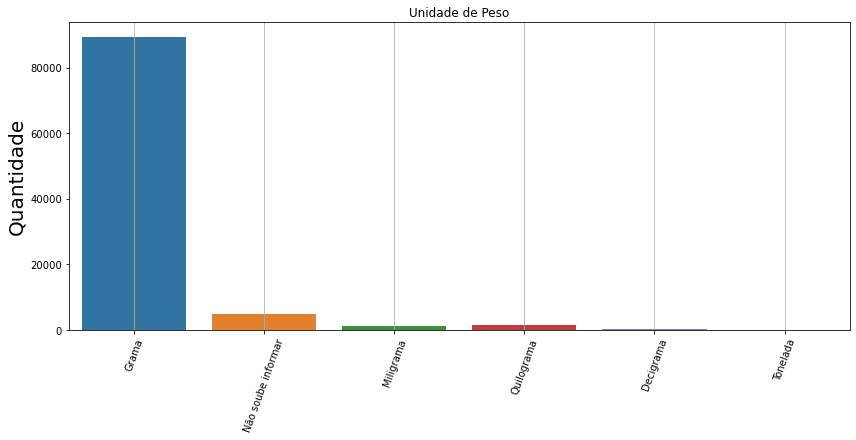

In [19]:
stores_df = resultado

f, (ax2) = plt.subplots(1, 1, figsize=(12, 6))
palette ={"Verde": "green", "Marrom": "brown", "Branco": "white", "Amarelo": "yellow","Cinza":'grey',"Dourado":'gold',"Laranja":"orange","Azul":"Blue","Vermelho":"Red",'Bege':'beige',"Preto":"black", "Incolor":"blue", "Rosa":"pink"}

#sns.countplot(x="Cor Predominante", data=stores_df, ax=ax1, palette = palette)
sns.countplot(x="Unidade de Peso", data=stores_df, ax=ax2)
#sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette)
palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
ax2.set(xlabel=None)
#ax1.set_ylabel("Quantidade",fontsize=20)
ax2.set_ylabel("Quantidade",fontsize=20)
plt.grid(axis='x')
plt.tight_layout()
plt.title('Unidade de Peso')

In [20]:
sem_info = resultado.loc[resultado['Unidade de Peso'] == 'Não soube informar']
sem_info['Tipo de Embalagem'].value_counts()

Porção(es)            2392
Cigarro(s)            1143
Unidade(s)             465
Não soube informar     206
Tijolo(s)              204
Comprimido(s)           90
Frasco(s)               72
Saco(s)                 56
Pacote(s)               34
Ponto(s)                19
Lata(s)                 10
Caixa(s)                10
Garrafa(s)               7
Galão(es)                6
Maço(s)                  4
Lote(s)                  1
Kit(s)                   1
Name: Tipo de Embalagem, dtype: int64

In [21]:
sem_info = resultado.loc[resultado['Unidade de Peso'] == 'Não soube informar']
com_info = resultado.loc[resultado['Unidade de Peso'] != 'Não soube informar']
com_info = com_info.reset_index(drop= True)
sem_info = sem_info.reset_index(drop=True)


In [22]:
porcao = com_info.loc[com_info['Tipo de Embalagem'] == 'Porção(es)']
porcao = porcao.loc[porcao['Unidade de Peso'] == 'Grama']
porcao = porcao.loc[porcao['Peso Unitário'].notna()]
porcao = porcao.reset_index(drop=True)
x = 0
while x < len(porcao):
    if porcao['Peso Unitário'][x] == '-':
        porcao['Peso Unitário'][x] = 0
    x += 1
    
porcao['Peso Unitário'] = porcao['Peso Unitário'].astype(float) 


In [23]:
print('Média')
print(porcao['Peso Unitário'].mean())
print('Mediana')
print(porcao['Peso Unitário'].median())
print('Quartil')
print(porcao['Peso Unitário'].quantile(0.25))

Média
24.21855409231139
Mediana
0.0
Quartil
0.0


In [24]:
porcao_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Porção(es)']
porcao_sem['Unidade de Peso'] = 'Grama'
porcao_sem['Peso Unitário'] = porcao['Peso Unitário'].median()


C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [25]:
cigarro_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Cigarro(s)']
cigarro_com = cigarro_com.loc[cigarro_com['Unidade de Peso'] == 'Grama']
cigarro_com = cigarro_com.loc[cigarro_com['Peso Unitário'].notna()]
cigarro_com = cigarro_com.reset_index(drop=True)
cigarro_com['Peso Unitário'] = cigarro_com['Peso Unitário'].astype(float) 
print('Média')
print(cigarro_com['Peso Unitário'].mean())
print('Mediana')
print(cigarro_com['Peso Unitário'].median())
print('Quartil')
print(cigarro_com['Peso Unitário'].quantile(0.25))

Média
0.7768401831618503
Mediana
0.07999999821186066
Quartil
0.0


In [26]:
cigarro_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Cigarro(s)']
cigarro_sem['Unidade de Peso'] = 'Grama'
cigarro_sem['Peso Unitário'] = cigarro_com['Peso Unitário'].median()

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [27]:
unidade_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Unidade(s)']
unidade_com = unidade_com.loc[unidade_com['Unidade de Peso'] == 'Grama']
unidade_com = unidade_com.loc[unidade_com['Peso Unitário'].notna()]
unidade_com = unidade_com.reset_index(drop=True)
unidade_com['Peso Unitário'] = unidade_com['Peso Unitário'].astype(float) 
print('Média')
print(unidade_com['Peso Unitário'].mean())
print('Mediana')
print(unidade_com['Peso Unitário'].median())
print('Quartil')
print(unidade_com['Peso Unitário'].quantile(0.25))

Média
6.995211243912069
Mediana
0.0
Quartil
0.0


In [28]:
unidade_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Unidade(s)']
unidade_sem['Unidade de Peso'] = 'Grama'
unidade_sem['Peso Unitário'] = unidade_com['Peso Unitário'].median()

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [29]:
tijolo_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Tijolo(s)']
tijolo_com = tijolo_com.loc[tijolo_com['Unidade de Peso'] == 'Grama']
tijolo_com = tijolo_com.loc[tijolo_com['Peso Unitário'].notna()]
tijolo_com = tijolo_com.reset_index(drop=True)
tijolo_com['Peso Unitário'] = tijolo_com['Peso Unitário'].astype(float) 
print('Média')
print(tijolo_com['Peso Unitário'].mean())
print('Mediana')
print(tijolo_com['Peso Unitário'].median())
print('Quartil')
print(tijolo_com['Peso Unitário'].quantile(0.25))

Média
286.39882319415534
Mediana
2.0
Quartil
0.0


In [30]:
tijolo_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Tijolo(s)']
tijolo_sem['Unidade de Peso'] = 'Grama'
tijolo_sem['Peso Unitário'] = tijolo_com['Peso Unitário'].median()

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [31]:
frasco_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Frasco(s)']
frasco_com = frasco_com.loc[frasco_com['Unidade de Peso'] == 'Grama']
frasco_com = frasco_com.loc[frasco_com['Peso Unitário'].notna()]
frasco_com = frasco_com.reset_index(drop=True)
frasco_com['Peso Unitário'] = frasco_com['Peso Unitário'].astype(float) 
print('Média')
print(frasco_com['Peso Unitário'].mean())
print('Mediana')
print(frasco_com['Peso Unitário'].median())
print('Quartil')
print(frasco_com['Peso Unitário'].quantile(0.25))

Média
6.316688453263252
Mediana
0.0
Quartil
0.0


In [32]:
frasco_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Frasco(s)']
frasco_sem['Unidade de Peso'] = 'Grama'
frasco_sem['Peso Unitário'] = frasco_com['Peso Unitário'].median()

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [33]:
pacote_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Pacote(s)']
pacote_com = pacote_com.loc[pacote_com['Unidade de Peso'] == 'Grama']
pacote_com = pacote_com.loc[pacote_com['Peso Unitário'].notna()]
pacote_com = pacote_com.reset_index(drop=True)
pacote_com['Peso Unitário'] = pacote_com['Peso Unitário'].astype(float) 
print('Média')
print(pacote_com['Peso Unitário'].mean())
print('Mediana')
print(pacote_com['Peso Unitário'].median())
print('Quartil')
print(pacote_com['Peso Unitário'].quantile(0.25))

Média
185.58288983378975
Mediana
1.0
Quartil
0.0


In [34]:
pacote_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Pacote(s)']
pacote_sem['Unidade de Peso'] = 'Grama'
pacote_sem['Peso Unitário'] = pacote_com['Peso Unitário'].median()

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [35]:
saco_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Saco(s)']
saco_com = saco_com.loc[saco_com['Unidade de Peso'] == 'Grama']
saco_com = saco_com.loc[saco_com['Peso Unitário'].notna()]
saco_com = saco_com.reset_index(drop=True)
saco_com['Peso Unitário'] = saco_com['Peso Unitário'].astype(float) 
print('Média')
print(saco_com['Peso Unitário'].mean())
print('Mediana')
print(saco_com['Peso Unitário'].median())
print('Quartil')
print(saco_com['Peso Unitário'].quantile(0.25))

Média
45.011573166273415
Mediana
0.0
Quartil
0.0


In [36]:
saco_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Saco(s)']
saco_sem['Unidade de Peso'] = 'Grama'
saco_sem['Peso Unitário'] = saco_com['Peso Unitário'].median()

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [37]:
ponto_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Ponto(s)']
ponto_com = ponto_com.loc[ponto_com['Unidade de Peso'] == 'Grama']
ponto_com = ponto_com.loc[ponto_com['Peso Unitário'].notna()]
ponto_com = ponto_com.reset_index(drop=True)
ponto_com['Peso Unitário'] = ponto_com['Peso Unitário'].astype(float) 
print('Média')
print(ponto_com['Peso Unitário'].mean())
print('Mediana')
print(ponto_com['Peso Unitário'].median())
print('Quartil')
print(ponto_com['Peso Unitário'].quantile(0.25))

Média
0.5791346164456067
Mediana
0.0
Quartil
0.0


In [38]:
ponto_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Ponto(s)']
ponto_sem['Unidade de Peso'] = 'Grama'
ponto_sem['Peso Unitário'] = ponto_com['Peso Unitário'].median()

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [39]:
lista = [ponto_sem, saco_sem, tijolo_sem, unidade_sem, cigarro_sem, pacote_sem, frasco_sem, porcao_sem]
sem_info2 = pd.concat(lista)

In [40]:
lista = [sem_info2, com_info]
resultado = pd.concat(lista)
resultado = resultado.reset_index(drop=True)


In [41]:
resultado['Unidade de Peso'].value_counts()

Grama         93693
Quilograma     1474
Miligrama      1200
Decigrama       288
Tonelada          5
Name: Unidade de Peso, dtype: int64

In [42]:
cores = resultado['Unidade de Peso'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0]})
cores = cores.iloc[1:]
cores1 = resultado['Unidade de Peso'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0]
                             })
#cores1 = cores.iloc[1:]
cores1
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"%"})
cores2

,Grama,Quilograma,Miligrama,Decigrama,4
Quantidade,93693,1474,1200,288,5
%,0.969305,0.015249,0.012415,0.00298,0.000052


Text(0.5, 1.0, 'Unidade de Peso')

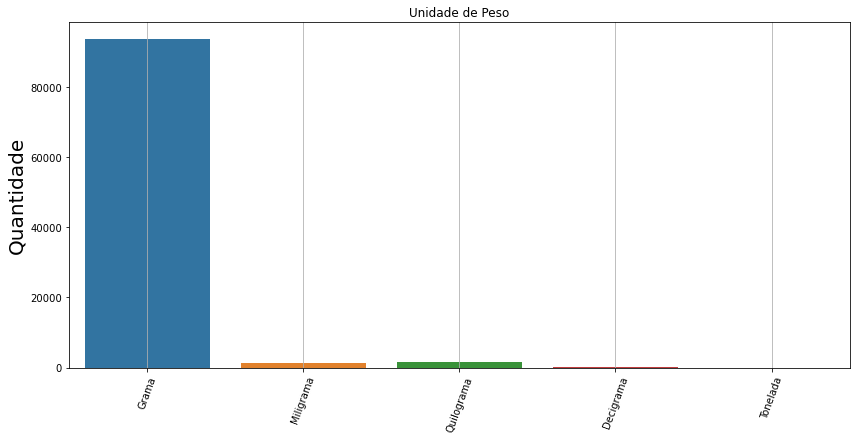

In [43]:
stores_df = resultado

f, (ax2) = plt.subplots(1, 1, figsize=(12, 6))
palette ={"Verde": "green", "Marrom": "brown", "Branco": "white", "Amarelo": "yellow","Cinza":'grey',"Dourado":'gold',"Laranja":"orange","Azul":"Blue","Vermelho":"Red",'Bege':'beige',"Preto":"black", "Incolor":"blue", "Rosa":"pink"}

#sns.countplot(x="Cor Predominante", data=stores_df, ax=ax1, palette = palette)
sns.countplot(x="Unidade de Peso", data=stores_df, ax=ax2)
#sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette)
palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
ax2.set(xlabel=None)
#ax1.set_ylabel("Quantidade",fontsize=20)
ax2.set_ylabel("Quantidade",fontsize=20)
plt.grid(axis='x')
plt.tight_layout()
plt.title('Unidade de Peso')

<h1><center>TIPO DE OBJETO</center></h1>

In [44]:
cores = resultado['TXT_TIPO_OBJETO'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0]})
cores = cores.iloc[1:]
cores1 = resultado['TXT_TIPO_OBJETO'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0][0]
                             })
#cores1 = cores.iloc[1:]
cores1
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"%"})
cores2['Crack']['%'] = cores2['C']['%']
cores2 = cores2.drop(['C'], axis = 1)
cores2

,Maconha,Drogas,Cocaína,Crack
Quantidade,41040,37350,20042,14464
%,0.36352,0.330835,0.177526,0.128118


Text(0.5, 1.0, 'Tipo de Objeto')

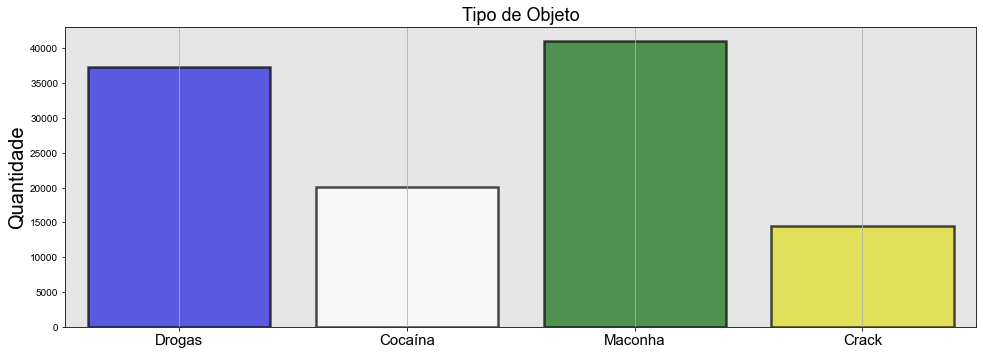

In [45]:
stores_df = resultado

palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
f, (ax3) = plt.subplots(1, 1, figsize=(14, 5))
sns.set(font_scale=1.5)

sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette, alpha = 0.7, linewidth=2.5, edgecolor=".0")
ax3.set_facecolor('#ababab')
ax3.patch.set_alpha(0.3)
ax3.set_xlabel("Tipo de Objeto",fontsize=20)
ax3.set_ylabel("Quantidade",fontsize=20)
ax3.set_xticklabels(ax3.get_xmajorticklabels(), fontsize = 15)
#ax3.set_yticklabels(ax3,fontsize = 18)
ax3.set(xlabel=None)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
plt.grid(axis='x')
plt.tight_layout()
plt.title('Tipo de Objeto')

In [46]:
Drogas = resultado.loc[resultado['TXT_TIPO_OBJETO'] == 'Drogas']
Drogas.sample(5)

,CHAVE_OBJETO,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso
105073,23903646,2021,2191,1025,Drogas,Verde,UMA PEQUENA PORÇÃO DE SUBSTÂNCIA SEMELHANTE A ...,25.0,25.0,1,Porção(es),Grama
67209,22833444,2020,9573,1025,Drogas,Bege,"03 porções de MDMA pesando, aproximadamente, 2...",290.0,0.0,3,Porção(es),Grama
80722,23226002,2020,5818,1025,Drogas,Amarelo,32 PETECAS DE SUBSTÂNCIA SEMELHANTE A CRACK,4.1,0.0,32,Unidade(s),NaN
52687,22457179,2020,3531,1025,Drogas,Amarelo,Aproximadamente 5gramas. 5 (cinco) porções ret...,5.0,0.0,28,Porção(es),NaN
4755,20051911,2018,7296,1025,Drogas,Branco,29 BUCHAS DE COCAÍNA,0.0,0.0,29,Porção(es),NaN


In [47]:
import unidecode

Drogas = resultado.loc[resultado['TXT_TIPO_OBJETO'] == 'Drogas']
Outras = resultado.loc[resultado['TXT_TIPO_OBJETO'] != 'Drogas']
Outras = Outras.reset_index(drop= True)
DrogasNA = Drogas.loc[Drogas['Descrição'].isnull()]
DrogasNA = DrogasNA.reset_index(drop=True)
Drogas = Drogas.loc[Drogas['Descrição'].notna()]
Drogas = Drogas.reset_index(drop=True)

x = 0
while x < len(Drogas):
    frase = Drogas['Descrição'][x]
    frase = frase.replace(',','')
    frase = frase.replace('.','')
    frase = unidecode.unidecode(frase)
    Drogas['Descrição'][x] = frase
    x += 1
    
Drogas['Descrição'] = Drogas['Descrição'].str.lower()



C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/3197949004.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Drogas['Descrição'][x] = frase


In [48]:

Drogas = Drogas.reset_index(drop=True)
x = 0
m = 0
c = 0
ck = 0
mc = 0
mck = 0
cck = 0
while x < len(Drogas):
    if 'maconha' in Drogas.Descrição[x]:
        Drogas['TXT_TIPO_OBJETO'].loc[x] = 'Maconha'
        m += 1
    if 'cannabis' in Drogas.Descrição[x]:
        Drogas['TXT_TIPO_OBJETO'].loc[x] = 'Maconha'
        m += 1
    if 'canabis' in Drogas.Descrição[x]:
        Drogas['TXT_TIPO_OBJETO'].loc[x] = 'Maconha'
        m += 1
        
    if 'cocaina' in Drogas.Descrição[x]:
        Drogas['TXT_TIPO_OBJETO'].loc[x] = 'Cocaína'
        c += 1
    if 'crack' in Drogas.Descrição[x]:
        Drogas['TXT_TIPO_OBJETO'].loc[x] = 'Crack'
        ck += 1
    if 'maconha' in Drogas.Descrição[x] and 'cocaina' in Drogas.Descrição[x]:
        mc += 1
    if 'maconha' in Drogas.Descrição[x] and 'crack' in Drogas.Descrição[x]:
        mck += 1
    if 'cocaina' in Drogas.Descrição[x] and 'crack' in Drogas.Descrição[x]:
        cck += 1
    x += 1

print('Achei %d maconha ' % m)
print('Achei %d cocaina ' % c)
print('Achei %d crack ' % ck)
print('Achei %d com maconha e cocaina' % mc)
print('Achei %d com maconha e crack' % mck)
print('Achei %d com cocaina e crack' % cck)

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Achei 17746 maconha 
Achei 8040 cocaina 
Achei 5797 crack 
Achei 13 com maconha e cocaina
Achei 12 com maconha e crack
Achei 38 com cocaina e crack


In [49]:
listaDrogas = [Drogas, DrogasNA]
Drogas = pd.concat(listaDrogas)
Drogas = Drogas.reset_index(drop=True)
lista = [Drogas, Outras]
Todas = pd.concat(lista)
Todas = Todas.reset_index(drop=True)

Text(0.5, 1.0, 'Tipo de Objeto')

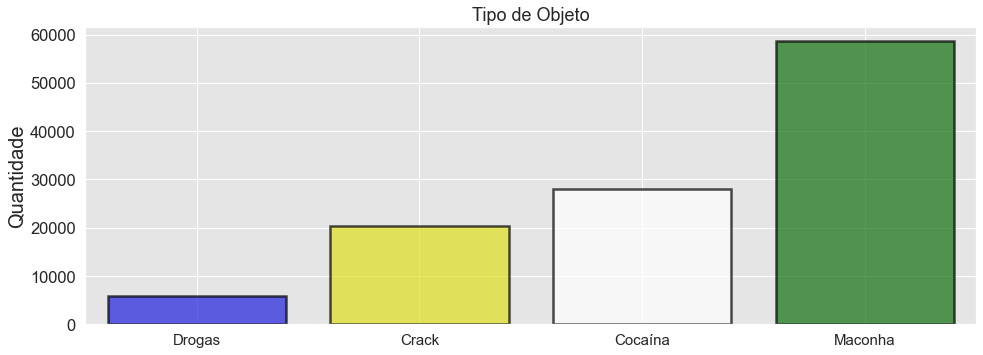

In [50]:
stores_df = Todas

palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
f, (ax3) = plt.subplots(1, 1, figsize=(14, 5))
sns.set(font_scale=1.5)

sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette, alpha = 0.7, linewidth=2.5, edgecolor=".0")
ax3.set_facecolor('#ababab')
ax3.patch.set_alpha(0.3)
ax3.set_xlabel("Tipo de Objeto",fontsize=20)
ax3.set_ylabel("Quantidade",fontsize=20)
ax3.set_xticklabels(ax3.get_xmajorticklabels(), fontsize = 15)
#ax3.set_yticklabels(ax3,fontsize = 18)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
ax3.set(xlabel=None)
plt.grid(axis='x')
plt.tight_layout()
plt.title('Tipo de Objeto')

In [51]:
cores = Todas['TXT_TIPO_OBJETO'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0]})
cores = cores.iloc[1:]
cores1 = Todas['TXT_TIPO_OBJETO'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0][0]
                             })
#cores1 = cores.iloc[1:]
cores1
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"%"})
cores2['Drogas']['%'] = cores2['D']['%']
cores2 = cores2.drop(['D'], axis = 1)
cores2

,Maconha,Cocaína,Crack,Drogas
Quantidade,58686,28044,20261,5905
%,0.519824,0.248406,0.179466,0.052305


In [52]:
resultado['Unidade de Peso'].value_counts()

Grama         93693
Quilograma     1474
Miligrama      1200
Decigrama       288
Tonelada          5
Name: Unidade de Peso, dtype: int64

In [53]:
x = 0
while x < len(resultado):
    if resultado['Unidade de Peso'][x] == 'Miligrama':
        resultado['Peso Unitário'][x] = resultado['Peso Unitário'][x] / 1000
        resultado['Unidade de Peso'][x] = 'Grama'
    if resultado['Unidade de Peso'][x] == 'Quilograma':
        resultado['Peso Unitário'][x] = resultado['Peso Unitário'][x] * 1000
        resultado['Unidade de Peso'][x] = 'Grama'
    if resultado['Unidade de Peso'][x] == 'Decigrama':
        resultado['Peso Unitário'][x] = resultado['Peso Unitário'][x] / 10
        resultado['Unidade de Peso'][x] = 'Grama'
    if resultado['Unidade de Peso'][x] == 'Tonelada':
        resultado['Peso Unitário'][x] = resultado['Peso Unitário'][x] * 1000000
        resultado['Unidade de Peso'][x] = 'Grama'
    else:
        x = x
    x += 1

C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/876263038.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['Peso Unitário'][x] = resultado['Peso Unitário'][x] / 1000
C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/876263038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['Unidade de Peso'][x] = 'Grama'
C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/876263038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [54]:
x = 0

while x < len(resultado):
    if resultado['Quantidade de Unidade(s)'][x] == '-':
        resultado['Quantidade de Unidade(s)'][x] = 0
    x += 1

C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/700781858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['Quantidade de Unidade(s)'][x] = 0


In [55]:
resultado['Quantidade de Unidade(s)'] = resultado['Quantidade de Unidade(s)'].astype(float) 

In [56]:
resultado2 = resultado.loc[resultado['Peso Total'] > 0]
resultado2 = resultado2.reset_index(drop=True)
resultado2.shape
# RESULTADO 2 = COM PESO TOTAL, PRONTO #

(80496, 12)

In [57]:
semtotal = resultado.loc[resultado['Peso Total'] < 0.001]
semtotal = semtotal.reset_index(drop=True)
semtotal.shape

(32400, 12)

In [58]:
com_quantidade =  semtotal.loc[semtotal['Quantidade de Unidade(s)'] > 0]
com_unitario = com_quantidade.loc[com_quantidade['Peso Unitário'] > 0]
com_unitario.shape

(5949, 12)

In [59]:
resultado3 = com_unitario
resultado3['Peso Total'] = com_unitario['Quantidade de Unidade(s)'] * com_unitario['Peso Unitário']
# RESULTADO 3 = COM PESO TOTAL, PRONTO #

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [60]:
resultado3

,CHAVE_OBJETO,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso
74,20135718,2018,12068,5,Maconha,Verde,tijolo grande envolto em fita adesiva cor marr...,2.0,2.0,1.0,Tijolo(s),Grama
75,20135720,2018,12068,5,Maconha,Verde,dois tijolos pequenos de erva esverdeada (seme...,4.0,2.0,2.0,Tijolo(s),Grama
76,20464225,2019,171,5,Maconha,Verde,NaN,2.0,2.0,1.0,Tijolo(s),Grama
77,20550868,2019,2105,5,Maconha,Verde,01 (UM) TIJOLINHO DE SUBSTÂNCIA SEMELHANTE À M...,2.0,2.0,1.0,Tijolo(s),Grama
78,20638932,2019,2716,1025,Drogas,Verde,NaN,2.0,2.0,1.0,Tijolo(s),Grama
...,...,...,...,...,...,...,...,...,...,...,...,...
32383,24126087,2021,1728,5,Maconha,Verde,NaN,50.0,50.0,1.0,Porção(es),Grama
32390,24126219,2021,14943,756,Cocaína,Branco,ENVOLTA EM EMBALAGEM PLÁSTICA,21.0,21.0,1.0,Porção(es),Grama
32391,24126221,2021,14943,757,Crack,Amarelo,ENVOLTO EM EMBALAGEM PLÁSTICA,30.0,30.0,1.0,Porção(es),Grama
32392,24126223,2021,14943,5,Maconha,Verde,ENVOLTA EM EMBALAGEM PLÁSTICA,5.0,5.0,1.0,Porção(es),Grama


In [61]:
sem_unitario = com_quantidade.loc[com_quantidade['Peso Unitário'] < 0.001]
sem_unitario.shape

(26365, 12)

In [62]:
df = semtotal.merge(com_unitario, on='CHAVE_OBJETO', how='outer', indicator = True)

In [63]:
df.shape

(32400, 24)

In [64]:
df = df.loc[df['_merge'] != 'both']
df.shape

(26451, 24)

In [65]:
df.columns

Index(['CHAVE_OBJETO', 'ANO_OCOR_x', 'NRO_OCOR_x', 'NRO_INT_TIPO_OBJETO_x',
       'TXT_TIPO_OBJETO_x', 'Cor Predominante_x', 'Descrição_x',
       'Peso Total_x', 'Peso Unitário_x', 'Quantidade de Unidade(s)_x',
       'Tipo de Embalagem_x', 'Unidade de Peso_x', 'ANO_OCOR_y', 'NRO_OCOR_y',
       'NRO_INT_TIPO_OBJETO_y', 'TXT_TIPO_OBJETO_y', 'Cor Predominante_y',
       'Descrição_y', 'Peso Total_y', 'Peso Unitário_y',
       'Quantidade de Unidade(s)_y', 'Tipo de Embalagem_y',
       'Unidade de Peso_y', '_merge'],
      dtype='object')

In [66]:
df = df.rename(columns={'TXT_TIPO_OBJETO_x':'TXT_TIPO_OBJETO', 'Peso Total_x':'Peso Total',
       'Cor Predominante_x':'Cor Predominante', 'Descrição_x':'Descrição', 'Unidade de Peso_x':'Unidade de Peso',
       'Tipo de Embalagem_x':'Tipo de Embalagem', 'Peso Unitário_x':'Peso Unitário', 'Quantidade de Unidade(s)_x':'Quantidade de Unidade(s)'})
df = df[['CHAVE_OBJETO', 'TXT_TIPO_OBJETO', 'Peso Total',
       'Cor Predominante', 'Descrição', 'Unidade de Peso', 'Tipo de Embalagem',
       'Peso Unitário', 'Quantidade de Unidade(s)']]

In [67]:
df = df. reset_index(drop=True)


In [68]:
df_maconha = df.loc[df['TXT_TIPO_OBJETO'] == 'Maconha']
df_maconha = df_maconha.reset_index(drop=True)

df_cocaina = df.loc[df['TXT_TIPO_OBJETO'] == 'Cocaína']
df_cocaina = df_cocaina.reset_index(drop=True)

df_crack = df.loc[df['TXT_TIPO_OBJETO'] == 'Crack']
df_crack = df_crack.reset_index(drop=True)

df_drogas = df.loc[df['TXT_TIPO_OBJETO'] == 'Drogas']
df_drogas = df_drogas.reset_index(drop=True)

print(df_crack.shape)
print(df_maconha.shape)
print(df_cocaina.shape)
print(df_drogas.shape)

(2797, 9)
(8979, 9)
(3744, 9)
(10931, 9)


In [69]:
#MACONHA#
maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Maconha']
maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
maconha_mediana_pU = maconha_resultado2['Peso Unitário'].median()
print(maconha_mediana_pU)

0.0


In [70]:
#COCAINA#
maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Cocaína']
maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
cocaina_mediana_pU = maconha_resultado2['Peso Unitário'].median()
print(cocaina_mediana_pU)

0.0


In [71]:
#CRACK#
maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Crack']
maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
crack_mediana_pU = maconha_resultado2['Peso Unitário'].median()
print(crack_mediana_pU)

0.0


In [72]:
#DROGAS#
maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Drogas']
maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
drogas_mediana_pU = maconha_resultado2['Peso Unitário'].median()
print(drogas_mediana_pU)

0.0


In [73]:
df1 = df.loc[df['Quantidade de Unidade(s)'] > 0]
df1 = df1.reset_index(drop=True)

df2 = df.loc[df['Quantidade de Unidade(s)'] < 0.001]
df2 = df2.reset_index(drop=True)

In [74]:
df1.shape

(26321, 9)

In [75]:
df2.shape

(130, 9)

In [76]:
x = 0

while x < len(df1):
    if df1['TXT_TIPO_OBJETO'][x] == 'Maconha':
        df1['Peso Unitário'][x] = maconha_mediana_pU
    if df1['TXT_TIPO_OBJETO'][x] == 'Cocaína':
        df1['Peso Unitário'][x] = cocaina_mediana_pU
    if df1['TXT_TIPO_OBJETO'][x] == 'Crack':
        df1['Peso Unitário'][x] = crack_mediana_pU
    if df1['TXT_TIPO_OBJETO'][x] == 'Drogas':
        df1['Peso Unitário'][x] = drogas_mediana_pU
    x += 1

C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/325618361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Peso Unitário'][x] = drogas_mediana_pU
C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/325618361.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Peso Unitário'][x] = cocaina_mediana_pU
C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/325618361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Peso Unitár

In [77]:
df1['Peso Total'] = df1['Peso Unitário'] * df1['Quantidade de Unidade(s)']
# df1 com PESO TOTAL, PRONTO#

In [78]:
x = 0

while x < len(df2):
    if df2['TXT_TIPO_OBJETO'][x] == 'Maconha':
        maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Maconha']
        maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
        maconha_mediana_pT = maconha_resultado2['Peso Total'].median()
        df2['Peso Total'][x] = maconha_mediana_pT
    if df2['TXT_TIPO_OBJETO'][x] == 'Cocaína':
        maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Cocaína']
        maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
        maconha_mediana_pT = maconha_resultado2['Peso Total'].median()
        df2['Peso Total'][x] = maconha_mediana_pT 
    if df2['TXT_TIPO_OBJETO'][x] == 'Crack':
        maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Crack']
        maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
        maconha_mediana_pT = maconha_resultado2['Peso Total'].median()
        df2['Peso Total'][x] = maconha_mediana_pT
    if df2['TXT_TIPO_OBJETO'][x] == 'Drogas':
        maconha_resultado2 = resultado2.loc[resultado2['TXT_TIPO_OBJETO'] == 'Drogas']
        maconha_resultado2 = maconha_resultado2.reset_index(drop=True)
        maconha_mediana_pT = maconha_resultado2['Peso Total'].median()
        df2['Peso Total'][x] = maconha_mediana_pT
    x += 1

C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x] = maconha_mediana_pT
C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x] = maconha_mediana_pT
C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x

C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x] = maconha_mediana_pT
C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x] = maconha_mediana_pT
C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x]

C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x] = maconha_mediana_pT
C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x] = maconha_mediana_pT
C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x]

C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x] = maconha_mediana_pT
C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x] = maconha_mediana_pT
C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x] =

C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x] = maconha_mediana_pT
C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x] = maconha_mediana_pT
C:\Users\giu_2\AppData\Local\Temp/ipykernel_5784/312657073.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Peso Total'][x]

In [79]:
# df2, com PESO TOTAL, PRONTO#
df.head(2)

,CHAVE_OBJETO,TXT_TIPO_OBJETO,Peso Total,Cor Predominante,Descrição,Unidade de Peso,Tipo de Embalagem,Peso Unitário,Quantidade de Unidade(s)
0,20205371,Drogas,0.0,Amarelo,dezesseis pontos de extase,Grama,Ponto(s),0.0,16.0
1,20428729,Drogas,0.0,Branco,"4 PONTOS DE LSD, COM DESENHO DE UM BONECO E UM...",Grama,Ponto(s),0.0,4.0


In [80]:
#resultado2.to_excel('testeDESCRICAO.xlsx')

In [81]:
lista = [resultado2, resultado3, df1, df2]
tudo = pd.concat(lista)

In [82]:
tudo = tudo.reset_index(drop=True)

In [83]:
tudo['Peso Total'].sum()

2888194837.3367834

In [84]:
maconha_tudo = tudo.loc[tudo['TXT_TIPO_OBJETO'] == 'Maconha']
maconha_tudo = maconha_tudo.reset_index(drop=True)
maconha_tudo = maconha_tudo.loc[maconha_tudo['Peso Total'] <= maconha_tudo['Peso Total'].quantile(0.99)]
maconha_tudo = maconha_tudo.loc[maconha_tudo['Peso Total'] >= maconha_tudo['Peso Total'].quantile(0.01)]
maconha_tudo = maconha_tudo.reset_index(drop=True)
                                
                                
cocaina_tudo = tudo.loc[tudo['TXT_TIPO_OBJETO'] == 'Cocaína']
cocaina_tudo = cocaina_tudo.reset_index(drop=True)
cocaina_tudo = cocaina_tudo.loc[cocaina_tudo['Peso Total'] <= cocaina_tudo['Peso Total'].quantile(0.99)]
cocaina_tudo = cocaina_tudo.loc[cocaina_tudo['Peso Total'] >= cocaina_tudo['Peso Total'].quantile(0.01)]
cocaina_tudo = cocaina_tudo.reset_index(drop=True)

crack_tudo = tudo.loc[tudo['TXT_TIPO_OBJETO'] == 'Crack']
crack_tudo = crack_tudo.reset_index(drop=True)
crack_tudo = crack_tudo.loc[crack_tudo['Peso Total'] <= crack_tudo['Peso Total'].quantile(0.99)]
crack_tudo = crack_tudo.loc[crack_tudo['Peso Total'] >= crack_tudo['Peso Total'].quantile(0.01)]
crack_tudo = crack_tudo.reset_index(drop=True)

drogas_tudo = tudo.loc[tudo['TXT_TIPO_OBJETO'] == 'Drogas']
drogas_tudo = drogas_tudo.reset_index(drop=True)
drogas_tudo = drogas_tudo.loc[drogas_tudo['Peso Total'] <= drogas_tudo['Peso Total'].quantile(0.99)]
drogas_tudo = drogas_tudo.loc[drogas_tudo['Peso Total'] >= drogas_tudo['Peso Total'].quantile(0.01)]
drogas_tudo = drogas_tudo.reset_index(drop=True)

In [85]:
lista = [maconha_tudo, cocaina_tudo, crack_tudo, drogas_tudo]
final = pd.concat(lista)
final = final.reset_index(drop=True)

In [86]:
final

,CHAVE_OBJETO,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso
0,22854828,2020.0,12689.0,5.0,Maconha,Verde,60KG 899 GRAMAS APROXIMADAMENTE DE MACONHA,60.889999,2.00,59.0,Tijolo(s),Grama
1,23347094,2021.0,256.0,5.0,Maconha,Verde,UM VASO COM VÁRIOS PÉS DE MACONHA,1.000000,0.00,1.0,Unidade(s),Grama
2,19617791,2018.0,5616.0,5.0,Maconha,Verde,NaN,0.200000,0.08,1.0,Cigarro(s),Grama
3,21056276,2019.0,5040.0,5.0,Maconha,Verde,Bitucas de Vegetal Seco Everdeado - Cigarro Ar...,0.400000,0.08,2.0,Cigarro(s),Grama
4,21157903,2019.0,1127.0,5.0,Maconha,Verde,UM CIGARRO ARTESANAL DE SUBSTÂNCIA CONHECIDA P...,0.010000,0.08,1.0,Cigarro(s),Grama
...,...,...,...,...,...,...,...,...,...,...,...,...
111764,23560467,NaN,NaN,NaN,Drogas,Verde,folhas de maconha,5.000000,0.00,0.0,Não soube informar,Grama
111765,23745762,NaN,NaN,NaN,Drogas,Branco,uma pequena porção de po branco reagente a coc...,5.000000,0.00,0.0,Porção(es),Grama
111766,24076773,NaN,NaN,NaN,Drogas,Branco,VÁRIAS PORÇÕES DE SUBSTÂNCIA BRANCA COM CARACT...,5.000000,0.00,0.0,Porção(es),Grama
111767,24076797,NaN,NaN,NaN,Drogas,Verde,VÁRIAS PORÇÕES DE SUBSTÂNCIA ESVERDEADA COM CA...,5.000000,0.00,0.0,Porção(es),Grama


In [87]:
dados = pd.read_csv('Ocorr_2018_2020.csv', encoding = 'latin-1', sep = ";")
dados_restante = pd.read_excel('ocorrencias_restantes.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'Ocorr_2018_2020.csv'

In [ ]:
dados.columns

In [ ]:
dados_restante = dados_restante[['Nro Ocor', 'Ano Registro', 'Orgão Registro', 'Orgão Carga',
       'Data Registro', 'Hora Registro', 'Data Fato', 'Hora Fato',
       'Dia da Semana', 'Codigo Fato', 'Descr Fato', 'Grupo Fato SSP',
       'Grupo Fato RS SEGURO', 'Tipo Fato', 'Flagrante', 'Município',
       'Nro Interno Ocorrência', 'Latitude', 'Longitude', 'Qtde Ocorrências',
       'Qtde Vitimas Mortas']]

In [ ]:
lista = [dados, dados_restante]
dados = pd.concat(lista)
dados = dados.reset_index(drop=True)

In [ ]:
dados['Nro Ocor'] = dados['Nro Ocor'].astype(int)

In [ ]:
dados.columns

In [ ]:
#dados = dados[dados['Nro Ocor'].isin(final['NUMERO'])]
#dados = dados.reset_index(drop=True)

In [ ]:
dados = dados[['Nro Ocor', 'Ano Registro', 'Orgão Registro', 'Orgão Carga', 'Data Registro', 'Data Fato', 'Hora Registro', 'Hora Fato', 'Dia da Semana','Descr Fato', 'Tipo Fato','Flagrante','Município','Latitude', 'Longitude']]

In [ ]:
final = final.rename(columns={'NUMERO':'Nro Ocor', 'ANO':'Ano Registro', 'ÓRGÃO':'Orgão Registro'})

In [ ]:
final['Orgão Registro'] =final['Orgão Registro'].astype(int)
final['Ano Registro'] = final['Ano Registro'].astype(int)
dados['Orgão Registro'] =dados['Orgão Registro'].astype(int)
dados['Ano Registro'] = dados['Ano Registro'].astype(int)

In [ ]:
final.shape

In [ ]:
dados.shape

In [ ]:
dois = pd.merge(final, dados, how='left', left_on=['Ano Registro','Orgão Registro','Nro Ocor'], right_on=['Ano Registro','Orgão Registro', 'Nro Ocor'])

In [ ]:
dois.shape

In [ ]:
dois

In [ ]:
semdata = dois.loc[dois['Data Fato'].isnull()]

In [ ]:
semdata = semdata.reset_index(drop=True)

In [ ]:
semdata.to_excel('Drogas_semData.xlsx')

In [ ]:
dois['Peso Total'].sum()

In [ ]:
res = dois.dropna(subset=['Data Fato'])
res.shape

In [ ]:
res = res.reset_index(drop = True)

In [ ]:
res['Data Fato'] = pd.to_datetime(res['Data Fato'])

In [ ]:
res.to_csv('drogas_final.csv')

In [ ]:
res.to_excel('drogas_final.xlsx')

In [ ]:
############### CORTES TEMPORAIS ###################
dados = res

In [ ]:
# CORTE DO PERÍODO # 
corteI = pd.Timestamp(year=2018, month=8, day=31, hour=0)
corteF = pd.Timestamp(year=2020, month=9, day=1, hour=0)
dados = dados.loc[dados['Data Fato'] > corteI]
dados = dados.loc[dados['Data Fato'] < corteF]
dados['CRIME'] = dados['Peso Total']

In [ ]:
dados.shape

In [ ]:
CVLI = dados
CVLI = CVLI.loc[CVLI['TXT_TIPO_OBJETO'] == "Crack"]
CVLI = CVLI.reset_index(drop=True)

In [ ]:
# CORTES SET/2018 ATÉ AGO/2019 #
corte_setI = pd.Timestamp(year=2018, month=8, day=31, hour=0)
corte_setF = pd.Timestamp(year=2018, month=10, day=1, hour=0)
CVLI_set = CVLI.loc[CVLI['Data Fato'] > corte_setI]
CVLI_set = CVLI_set.loc[CVLI_set['Data Fato'] < corte_setF]
CVLI_set18 = CVLI_set.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=9, day=30, hour=0)
corte_F = pd.Timestamp(year=2018, month=11, day=1, hour=0)
CVLI_out = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_out = CVLI_out.loc[CVLI_out['Data Fato'] < corte_F]
CVLI_out18 = CVLI_out.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=10, day=31, hour=0)
corte_F = pd.Timestamp(year=2018, month=12, day=1, hour=0)
CVLI_nov = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_nov = CVLI_nov.loc[CVLI_nov['Data Fato'] < corte_F]
CVLI_nov18 = CVLI_nov.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=11, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=1, day=1, hour=0)
CVLI_dez = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_dez = CVLI_dez.loc[CVLI_dez['Data Fato'] < corte_F]
CVLI_dez18 = CVLI_dez.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=12, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=2, day=1, hour=0)
CVLI_jan = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jan = CVLI_jan.loc[CVLI_jan['Data Fato'] < corte_F]
CVLI_jan19 = CVLI_jan.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=1, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=3, day=1, hour=0)
CVLI_fev = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_fev = CVLI_fev.loc[CVLI_fev['Data Fato'] < corte_F]
CVLI_fev19 = CVLI_fev.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=2, day=28, hour=0)
corte_F = pd.Timestamp(year=2019, month=4, day=1, hour=0)
CVLI_mar = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mar = CVLI_mar.loc[CVLI_mar['Data Fato'] < corte_F]
CVLI_mar19 = CVLI_mar.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=3, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=5, day=1, hour=0)
CVLI_abr = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_abr = CVLI_abr.loc[CVLI_abr['Data Fato'] < corte_F]
CVLI_abr19 = CVLI_abr.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=4, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=6, day=1, hour=0)
CVLI_mai = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mai = CVLI_mai.loc[CVLI_mai['Data Fato'] < corte_F]
CVLI_mai19 = CVLI_mai.reset_index(drop=True)


corte_I = pd.Timestamp(year=2019, month=5, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=7, day=1, hour=0)
CVLI_jun = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jun = CVLI_jun.loc[CVLI_jun['Data Fato'] < corte_F]
CVLI_jun19 = CVLI_jun.reset_index(drop=True)


corte_I = pd.Timestamp(year=2019, month=6, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=8, day=1, hour=0)
CVLI_jul = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jul = CVLI_jul.loc[CVLI_jul['Data Fato'] < corte_F]
CVLI_jul19 = CVLI_jul.reset_index(drop=True)


corte_I = pd.Timestamp(year=2019, month=7, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=9, day=1, hour=0)
CVLI_ago = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_ago = CVLI_ago.loc[CVLI_ago['Data Fato'] < corte_F]
CVLI_ago19 = CVLI_ago.reset_index(drop=True)


# CORTES SET/2019 ATÉ AGO/2020 #
corte_setI = pd.Timestamp(year=2019, month=8, day=31, hour=0)
corte_setF = pd.Timestamp(year=2019, month=10, day=1, hour=0)
CVLI_set = CVLI.loc[CVLI['Data Fato'] > corte_setI]
CVLI_set = CVLI_set.loc[CVLI_set['Data Fato'] < corte_setF]
CVLI_set19 = CVLI_set.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=9, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=11, day=1, hour=0)
CVLI_out = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_out = CVLI_out.loc[CVLI_out['Data Fato'] < corte_F]
CVLI_out19 = CVLI_out.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=10, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=12, day=1, hour=0)
CVLI_nov = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_nov = CVLI_nov.loc[CVLI_nov['Data Fato'] < corte_F]
CVLI_nov19 = CVLI_nov.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=11, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=1, day=1, hour=0)
CVLI_dez = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_dez = CVLI_dez.loc[CVLI_dez['Data Fato'] < corte_F]
CVLI_dez19 = CVLI_dez.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=12, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=2, day=1, hour=0)
CVLI_jan = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jan = CVLI_jan.loc[CVLI_jan['Data Fato'] < corte_F]
CVLI_jan20 = CVLI_jan.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=1, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=3, day=1, hour=0)
CVLI_fev = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_fev = CVLI_fev.loc[CVLI_fev['Data Fato'] < corte_F]
CVLI_fev20 = CVLI_fev.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=2, day=29, hour=0)
corte_F = pd.Timestamp(year=2020, month=4, day=1, hour=0)
CVLI_mar = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mar = CVLI_mar.loc[CVLI_mar['Data Fato'] < corte_F]
CVLI_mar20 = CVLI_mar.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=3, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=5, day=1, hour=0)
CVLI_abr = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_abr = CVLI_abr.loc[CVLI_abr['Data Fato'] < corte_F]
CVLI_abr20 = CVLI_abr.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=4, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=6, day=1, hour=0)
CVLI_mai = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mai = CVLI_mai.loc[CVLI_mai['Data Fato'] < corte_F]
CVLI_mai20 = CVLI_mai.reset_index(drop=True)


corte_I = pd.Timestamp(year=2020, month=5, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=7, day=1, hour=0)
CVLI_jun = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jun = CVLI_jun.loc[CVLI_jun['Data Fato'] < corte_F]
CVLI_jun20 = CVLI_jun.reset_index(drop=True)


corte_I = pd.Timestamp(year=2020, month=6, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=8, day=1, hour=0)
CVLI_jul = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jul = CVLI_jul.loc[CVLI_jul['Data Fato'] < corte_F]
CVLI_jul20 = CVLI_jul.reset_index(drop=True)


corte_I = pd.Timestamp(year=2020, month=7, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=9, day=1, hour=0)
CVLI_ago = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_ago = CVLI_ago.loc[CVLI_ago['Data Fato'] < corte_F]
CVLI_ago20 = CVLI_ago.reset_index(drop=True)


CVLI_set2 = CVLI_set18.groupby(by='Município').sum()
CVLI_set2 = CVLI_set2.reset_index()
CVLI_set2 = CVLI_set2[['Município','CRIME']]
CVLI_set18 = CVLI_set2.reset_index(drop=True)

CVLI_out2 = CVLI_out18.groupby(by='Município').sum()
CVLI_out2 = CVLI_out2.reset_index()
CVLI_out2 = CVLI_out2[['Município','CRIME']]
CVLI_out18 = CVLI_out2.reset_index(drop=True)

CVLI_nov2 = CVLI_nov18.groupby(by='Município').sum()
CVLI_nov2 = CVLI_nov2.reset_index()
CVLI_nov2 = CVLI_nov2[['Município','CRIME']]
CVLI_nov18 = CVLI_nov2.reset_index(drop=True)

CVLI_dez2 = CVLI_dez18.groupby(by='Município').sum()
CVLI_dez2 = CVLI_dez2.reset_index()
CVLI_dez2 = CVLI_dez2[['Município','CRIME']]
CVLI_dez18 = CVLI_dez2.reset_index(drop=True)

CVLI_jan2 = CVLI_jan19.groupby(by='Município').sum()
CVLI_jan2 = CVLI_jan2.reset_index()
CVLI_jan2 = CVLI_jan2[['Município','CRIME']]
CVLI_jan19 = CVLI_jan2.reset_index(drop=True)

CVLI_fev2 = CVLI_fev19.groupby(by='Município').sum()
CVLI_fev2 = CVLI_fev2.reset_index()
CVLI_fev2 = CVLI_fev2[['Município','CRIME']]
CVLI_fev19 = CVLI_fev2.reset_index(drop=True)

CVLI_mar2 = CVLI_mar19.groupby(by='Município').sum()
CVLI_mar2 = CVLI_mar2.reset_index()
CVLI_mar2 = CVLI_mar2[['Município','CRIME']]
CVLI_mar19 = CVLI_mar2.reset_index(drop=True)

CVLI_abr2 = CVLI_abr19.groupby(by='Município').sum()
CVLI_abr2 = CVLI_abr2.reset_index()
CVLI_abr2 = CVLI_abr2[['Município','CRIME']]
CVLI_abr19 = CVLI_abr2.reset_index(drop=True)

CVLI_mai2 = CVLI_mai19.groupby(by='Município').sum()
CVLI_mai2 = CVLI_mai2.reset_index()
CVLI_mai2 = CVLI_mai2[['Município','CRIME']]
CVLI_mai19 = CVLI_mai2.reset_index(drop=True)

CVLI_jun2 = CVLI_jun19.groupby(by='Município').sum()
CVLI_jun2 = CVLI_jun2.reset_index()
CVLI_jun2 = CVLI_jun2[['Município','CRIME']]
CVLI_jun19 = CVLI_jun2.reset_index(drop=True)

CVLI_jul2 = CVLI_jul19.groupby(by='Município').sum()
CVLI_jul2 = CVLI_jul2.reset_index()
CVLI_jul2 = CVLI_jul2[['Município','CRIME']]
CVLI_jul19 = CVLI_jul2.reset_index(drop=True)

CVLI_ago2 = CVLI_ago19.groupby(by='Município').sum()
CVLI_ago2 = CVLI_ago2.reset_index()
CVLI_ago2 = CVLI_ago2[['Município','CRIME']]
CVLI_ago19 = CVLI_ago2.reset_index(drop=True)

CVLI_set2 = CVLI_set19.groupby(by='Município').sum()
CVLI_set2 = CVLI_set2.reset_index()
CVLI_set2 = CVLI_set2[['Município','CRIME']]
CVLI_set19 = CVLI_set2.reset_index(drop=True)

CVLI_out2 = CVLI_out19.groupby(by='Município').sum()
CVLI_out2 = CVLI_out2.reset_index()
CVLI_out2 = CVLI_out2[['Município','CRIME']]
CVLI_out19 = CVLI_out2.reset_index(drop=True)

CVLI_nov2 = CVLI_nov19.groupby(by='Município').sum()
CVLI_nov2 = CVLI_nov2.reset_index()
CVLI_nov2 = CVLI_nov2[['Município','CRIME']]
CVLI_nov19 = CVLI_nov2.reset_index(drop=True)

CVLI_dez2 = CVLI_dez19.groupby(by='Município').sum()
CVLI_dez2 = CVLI_dez2.reset_index()
CVLI_dez2 = CVLI_dez2[['Município','CRIME']]
CVLI_dez19 = CVLI_dez2.reset_index(drop=True)

CVLI_jan2 = CVLI_jan20.groupby(by='Município').sum()
CVLI_jan2 = CVLI_jan2.reset_index()
CVLI_jan2 = CVLI_jan2[['Município','CRIME']]
CVLI_jan20 = CVLI_jan2.reset_index(drop=True)

CVLI_fev2 = CVLI_fev20.groupby(by='Município').sum()
CVLI_fev2 = CVLI_fev2.reset_index()
CVLI_fev2 = CVLI_fev2[['Município','CRIME']]
CVLI_fev20 = CVLI_fev2.reset_index(drop=True)

CVLI_mar2 = CVLI_mar20.groupby(by='Município').sum()
CVLI_mar2 = CVLI_mar2.reset_index()
CVLI_mar2 = CVLI_mar2[['Município','CRIME']]
CVLI_mar20 = CVLI_mar2.reset_index(drop=True)

CVLI_abr2 = CVLI_abr20.groupby(by='Município').sum()
CVLI_abr2 = CVLI_abr2.reset_index()
CVLI_abr2 = CVLI_abr2[['Município','CRIME']]
CVLI_abr20 = CVLI_abr2.reset_index(drop=True)

CVLI_mai2 = CVLI_mai20.groupby(by='Município').sum()
CVLI_mai2 = CVLI_mai2.reset_index()
CVLI_mai2 = CVLI_mai2[['Município','CRIME']]
CVLI_mai20 = CVLI_mai2.reset_index(drop=True)

CVLI_jun2 = CVLI_jun20.groupby(by='Município').sum()
CVLI_jun2 = CVLI_jun2.reset_index()
CVLI_jun2 = CVLI_jun2[['Município','CRIME']]
CVLI_jun20 = CVLI_jun2.reset_index(drop=True)

CVLI_jul2 = CVLI_jul20.groupby(by='Município').sum()
CVLI_jul2 = CVLI_jul2.reset_index()
CVLI_jul2 = CVLI_jul2[['Município','CRIME']]
CVLI_jul20 = CVLI_jul2.reset_index(drop=True)

CVLI_ago2 = CVLI_ago20.groupby(by='Município').sum()
CVLI_ago2 = CVLI_ago2.reset_index()
CVLI_ago2 = CVLI_ago2[['Município','CRIME']]
CVLI_ago20 = CVLI_ago2.reset_index(drop=True)

# CIDADES RS SEGURO #
cidades = pd.read_excel('cidades.xlsx')

resultado = pd.merge(cidades, CVLI_set18, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Setembro-18'})

resultado = pd.merge(resultado, CVLI_out18, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Outubro-18'})

resultado = pd.merge(resultado, CVLI_nov18, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Novembro-18'})

resultado = pd.merge(resultado, CVLI_dez18, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Dezembro-18'})

resultado = pd.merge(resultado, CVLI_jan19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Janeiro-19'})

resultado = pd.merge(resultado, CVLI_fev19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Fevereiro-19'})

resultado = pd.merge(resultado, CVLI_mar19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Março-19'})

resultado = pd.merge(resultado, CVLI_abr19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Abril-19'})

resultado = pd.merge(resultado, CVLI_mai19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Maio-19'})

resultado = pd.merge(resultado, CVLI_jun19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Junho-19'})

resultado = pd.merge(resultado, CVLI_jul19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Julho-19'})

resultado = pd.merge(resultado, CVLI_ago19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Agosto-19'})

resultado = pd.merge(resultado, CVLI_set19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Setembro-19'})

resultado = pd.merge(resultado, CVLI_out19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Outubro-19'})

resultado = pd.merge(resultado, CVLI_nov19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Novembro-19'})

resultado = pd.merge(resultado, CVLI_dez19, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Dezembro-19'})

resultado = pd.merge(resultado, CVLI_jan20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Janeiro-20'})

resultado = pd.merge(resultado, CVLI_fev20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Fevereiro-20'})

resultado = pd.merge(resultado, CVLI_mar20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Março-20'})

resultado = pd.merge(resultado, CVLI_abr20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Abril-20'})

resultado = pd.merge(resultado, CVLI_mai20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Maio-20'})

resultado = pd.merge(resultado, CVLI_jun20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Junho-20'})

resultado = pd.merge(resultado, CVLI_jul20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Julho-20'})

resultado = pd.merge(resultado, CVLI_ago20, how="left", on='Município')
resultado = resultado.rename(columns={'CRIME':'Agosto-20'})

resultado_drogas_todas = resultado.fillna(0)



In [ ]:
resultado_drogas_todas.to_excel('resultado_drogas_Crack.xlsx')

In [ ]:
resultado_drogas_todas

In [ ]:
### ESTADO ####

In [ ]:
CVLI = dados
CVLI = CVLI.loc[CVLI['TXT_TIPO_OBJETO'] == "Crack"]
CVLI = CVLI.reset_index(drop=True)

In [ ]:
# CORTES SET/2018 ATÉ AGO/2019 #
corte_setI = pd.Timestamp(year=2018, month=8, day=31, hour=0)
corte_setF = pd.Timestamp(year=2018, month=10, day=1, hour=0)
CVLI_set = CVLI.loc[CVLI['Data Fato'] > corte_setI]
CVLI_set = CVLI_set.loc[CVLI_set['Data Fato'] < corte_setF]
CVLI_set18 = CVLI_set.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=9, day=30, hour=0)
corte_F = pd.Timestamp(year=2018, month=11, day=1, hour=0)
CVLI_out = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_out = CVLI_out.loc[CVLI_out['Data Fato'] < corte_F]
CVLI_out18 = CVLI_out.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=10, day=31, hour=0)
corte_F = pd.Timestamp(year=2018, month=12, day=1, hour=0)
CVLI_nov = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_nov = CVLI_nov.loc[CVLI_nov['Data Fato'] < corte_F]
CVLI_nov18 = CVLI_nov.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=11, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=1, day=1, hour=0)
CVLI_dez = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_dez = CVLI_dez.loc[CVLI_dez['Data Fato'] < corte_F]
CVLI_dez18 = CVLI_dez.reset_index(drop=True)

corte_I = pd.Timestamp(year=2018, month=12, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=2, day=1, hour=0)
CVLI_jan = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jan = CVLI_jan.loc[CVLI_jan['Data Fato'] < corte_F]
CVLI_jan19 = CVLI_jan.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=1, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=3, day=1, hour=0)
CVLI_fev = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_fev = CVLI_fev.loc[CVLI_fev['Data Fato'] < corte_F]
CVLI_fev19 = CVLI_fev.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=2, day=28, hour=0)
corte_F = pd.Timestamp(year=2019, month=4, day=1, hour=0)
CVLI_mar = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mar = CVLI_mar.loc[CVLI_mar['Data Fato'] < corte_F]
CVLI_mar19 = CVLI_mar.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=3, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=5, day=1, hour=0)
CVLI_abr = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_abr = CVLI_abr.loc[CVLI_abr['Data Fato'] < corte_F]
CVLI_abr19 = CVLI_abr.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=4, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=6, day=1, hour=0)
CVLI_mai = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mai = CVLI_mai.loc[CVLI_mai['Data Fato'] < corte_F]
CVLI_mai19 = CVLI_mai.reset_index(drop=True)


corte_I = pd.Timestamp(year=2019, month=5, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=7, day=1, hour=0)
CVLI_jun = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jun = CVLI_jun.loc[CVLI_jun['Data Fato'] < corte_F]
CVLI_jun19 = CVLI_jun.reset_index(drop=True)


corte_I = pd.Timestamp(year=2019, month=6, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=8, day=1, hour=0)
CVLI_jul = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jul = CVLI_jul.loc[CVLI_jul['Data Fato'] < corte_F]
CVLI_jul19 = CVLI_jul.reset_index(drop=True)


corte_I = pd.Timestamp(year=2019, month=7, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=9, day=1, hour=0)
CVLI_ago = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_ago = CVLI_ago.loc[CVLI_ago['Data Fato'] < corte_F]
CVLI_ago19 = CVLI_ago.reset_index(drop=True)


# CORTES SET/2019 ATÉ AGO/2020 #
corte_setI = pd.Timestamp(year=2019, month=8, day=31, hour=0)
corte_setF = pd.Timestamp(year=2019, month=10, day=1, hour=0)
CVLI_set = CVLI.loc[CVLI['Data Fato'] > corte_setI]
CVLI_set = CVLI_set.loc[CVLI_set['Data Fato'] < corte_setF]
CVLI_set19 = CVLI_set.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=9, day=30, hour=0)
corte_F = pd.Timestamp(year=2019, month=11, day=1, hour=0)
CVLI_out = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_out = CVLI_out.loc[CVLI_out['Data Fato'] < corte_F]
CVLI_out19 = CVLI_out.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=10, day=31, hour=0)
corte_F = pd.Timestamp(year=2019, month=12, day=1, hour=0)
CVLI_nov = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_nov = CVLI_nov.loc[CVLI_nov['Data Fato'] < corte_F]
CVLI_nov19 = CVLI_nov.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=11, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=1, day=1, hour=0)
CVLI_dez = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_dez = CVLI_dez.loc[CVLI_dez['Data Fato'] < corte_F]
CVLI_dez19 = CVLI_dez.reset_index(drop=True)

corte_I = pd.Timestamp(year=2019, month=12, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=2, day=1, hour=0)
CVLI_jan = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jan = CVLI_jan.loc[CVLI_jan['Data Fato'] < corte_F]
CVLI_jan20 = CVLI_jan.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=1, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=3, day=1, hour=0)
CVLI_fev = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_fev = CVLI_fev.loc[CVLI_fev['Data Fato'] < corte_F]
CVLI_fev20 = CVLI_fev.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=2, day=29, hour=0)
corte_F = pd.Timestamp(year=2020, month=4, day=1, hour=0)
CVLI_mar = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mar = CVLI_mar.loc[CVLI_mar['Data Fato'] < corte_F]
CVLI_mar20 = CVLI_mar.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=3, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=5, day=1, hour=0)
CVLI_abr = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_abr = CVLI_abr.loc[CVLI_abr['Data Fato'] < corte_F]
CVLI_abr20 = CVLI_abr.reset_index(drop=True)

corte_I = pd.Timestamp(year=2020, month=4, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=6, day=1, hour=0)
CVLI_mai = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_mai = CVLI_mai.loc[CVLI_mai['Data Fato'] < corte_F]
CVLI_mai20 = CVLI_mai.reset_index(drop=True)


corte_I = pd.Timestamp(year=2020, month=5, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=7, day=1, hour=0)
CVLI_jun = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jun = CVLI_jun.loc[CVLI_jun['Data Fato'] < corte_F]
CVLI_jun20 = CVLI_jun.reset_index(drop=True)


corte_I = pd.Timestamp(year=2020, month=6, day=30, hour=0)
corte_F = pd.Timestamp(year=2020, month=8, day=1, hour=0)
CVLI_jul = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_jul = CVLI_jul.loc[CVLI_jul['Data Fato'] < corte_F]
CVLI_jul20 = CVLI_jul.reset_index(drop=True)


corte_I = pd.Timestamp(year=2020, month=7, day=31, hour=0)
corte_F = pd.Timestamp(year=2020, month=9, day=1, hour=0)
CVLI_ago = CVLI.loc[CVLI['Data Fato'] > corte_I]
CVLI_ago = CVLI_ago.loc[CVLI_ago['Data Fato'] < corte_F]
CVLI_ago20 = CVLI_ago.reset_index(drop=True)

ESTADO = pd.DataFrame(np.zeros((1,1)))

ESTADO['Set-18'] = ''
ESTADO['Set-18'][0] = CVLI_set18.CRIME.sum()
ESTADO['Out-18'] = ''
ESTADO['Out-18'][0] = CVLI_out18.CRIME.sum()
ESTADO['Nov-18'] = ''
ESTADO['Nov-18'][0] = CVLI_nov18.CRIME.sum()
ESTADO['Dez-18'] = ''
ESTADO['Dez-18'][0] = CVLI_dez18.CRIME.sum()
ESTADO['Jan-19'] = ''
ESTADO['Jan-19'][0] = CVLI_jan19.CRIME.sum()
ESTADO['Fev-19'] = ''
ESTADO['Fev-19'][0] = CVLI_fev19.CRIME.sum()
ESTADO['Mar-19'] = ''
ESTADO['Mar-19'][0] = CVLI_mar19.CRIME.sum()
ESTADO['Abr-19'] = ''
ESTADO['Abr-19'][0] = CVLI_abr19.CRIME.sum()
ESTADO['Mai-19'] = ''
ESTADO['Mai-19'][0] = CVLI_mai19.CRIME.sum()
ESTADO['Jun-19'] = ''
ESTADO['Jun-19'][0] = CVLI_jun19.CRIME.sum()
ESTADO['Jul-19'] = ''
ESTADO['Jul-19'][0] = CVLI_jul19.CRIME.sum()
ESTADO['Ago-19'] = ''
ESTADO['Ago-19'][0] = CVLI_ago19.CRIME.sum()
ESTADO['Set-19'] = ''
ESTADO['Set-19'][0] = CVLI_set19.CRIME.sum()
ESTADO['Out-19'] = ''
ESTADO['Out-19'][0] = CVLI_out19.CRIME.sum()
ESTADO['Nov-19'] = ''
ESTADO['Nov-19'][0] = CVLI_nov19.CRIME.sum()
ESTADO['Dez-19'] = ''
ESTADO['Dez-19'][0] = CVLI_dez19.CRIME.sum()
ESTADO['Jan-20'] = ''
ESTADO['Jan-20'][0] = CVLI_jan20.CRIME.sum()
ESTADO['Fev-20'] = ''
ESTADO['Fev-20'][0] = CVLI_fev20.CRIME.sum()
ESTADO['Mar-20'] = ''
ESTADO['Mar-20'][0] = CVLI_mar20.CRIME.sum()
ESTADO['Abr-20'] = ''
ESTADO['Abr-20'][0] = CVLI_abr20.CRIME.sum()
ESTADO['Mai-20'] = ''
ESTADO['Mai-20'][0] = CVLI_mai20.CRIME.sum()
ESTADO['Jun-20'] = ''
ESTADO['Jun-20'][0] = CVLI_jun20.CRIME.sum()
ESTADO['Jul-20'] = ''
ESTADO['Jul-20'][0] = CVLI_jul20.CRIME.sum()
ESTADO['Ago-20'] = ''
ESTADO['Ago-20'][0] = CVLI_ago20.CRIME.sum()

ESTADO = ESTADO.drop([0], axis = 1)



In [ ]:
ESTADO.to_excel('resultado_ESTADO_todasCrack.xlsx')

In [ ]:
ESTADO